In [7]:
#import 
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import simplekml



In [2]:
nodes = np.genfromtxt('data/I210_node.csv', delimiter=',', skip_header=1)
network = np.genfromtxt('data/I210Sketch_net.csv',skip_header=7)

## Calculate properties

In [104]:
#script used: http://andrew.hedges.name/experiments/haversine/
#or http://www.johndcook.com/blog/python_longitude_latitude/ 
def distance_on_unit_sphere(lat1, long1, lat2, long2):
 
    # Convert latitude and longitude to 
    # spherical coordinates in radians.
    degrees_to_radians = math.pi/180.0
         
    # phi = 90 - latitude
    phi1 = (90.0 - lat1)*degrees_to_radians
    phi2 = (90.0 - lat2)*degrees_to_radians
         
    # theta = longitude
    theta1 = long1*degrees_to_radians
    theta2 = long2*degrees_to_radians
         
    # Compute spherical distance from spherical coordinates.
         
    # For two locations in spherical coordinates 
    # (1, theta, phi) and (1, theta', phi')
    # cosine( arc length ) = 
    #    sin phi sin phi' cos(theta-theta') + cos phi cos phi'
    # distance = rho * arc length
     
    cos = (math.sin(phi1)*math.sin(phi2)*math.cos(theta1 - theta2) + 
           math.cos(phi1)*math.cos(phi2))
    arc = math.acos( cos )
 
    # Remember to multiply arc by the radius of the earth 
    # in your favorite set of units to get length.
    return arc

In [118]:
# compute length and travel time of each link
def set_properties(nodes, network,v_arterial, v_highway):
    R=3961
    for i in range(len(network)):
        o_lat = nodes[int(network[i][0])-1][1]
        o_long = nodes[int(network[i][0])-1][2]
        d_lat = nodes[int(network[i][1])-1][1]
        d_long = nodes[int(network[i][1])-1][2]
        c = distance_on_unit_sphere(o_lat, o_long, d_lat, d_long)
        d = R*c
        network[i][3] = d
        if network[i][2]>4000:
            fftt = network[i][3]/v_highway
        else:
            fftt = network[i][3]/v_arterial
        network[i][4] = fftt
    n=np.delete(network, 10, 1)
    np.savetxt('mynewnetwork.txt', n, fmt='%d %d %d %1.5f %1.2f %1.2f %d %d %d %d', delimiter='\t', newline='\t;\n', header='', footer='', comments='# ')
            
    

In [119]:
v_arterial = 3/float(8)
v_highway = 65/float(60)
set_properties(nodes,network,v_arterial,v_highway)

##Plot network

In [3]:
#create a numpy array containing informations of both I210_node and I210_net
featuredNetwork = np.zeros((len(network),9))
featuredNetwork[:,0]=network[:,0] # index of origin vertex
featuredNetwork[:,3]=network[:,1] # index of destination vertex
for i in range(len(featuredNetwork)):
    featuredNetwork[i,1]=nodes[featuredNetwork[i,0]-1,2] #longitude of origin
    featuredNetwork[i,2]=nodes[featuredNetwork[i,0]-1,1] #latitude of origin
    featuredNetwork[i,4]=nodes[featuredNetwork[i,3]-1,2] #longitude of destination
    featuredNetwork[i,5]=nodes[featuredNetwork[i,3]-1,1] #latitude of destination
featuredNetwork[:,6]=network[:,2] # capacity
featuredNetwork[:,7]=network[:,3] #length
featuredNetwork[:,8]=network[:,4] ##fftt

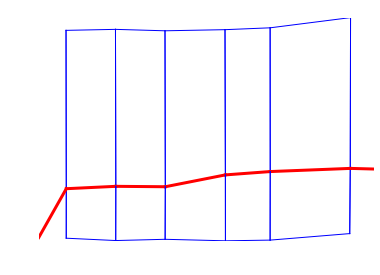

In [26]:
plt.figure()
for i in range(len(featuredNetwork)):
    lines = plt.plot([featuredNetwork[i,1], featuredNetwork[i,4]], [featuredNetwork[i,2], featuredNetwork[i,5]])
    if featuredNetwork[i,6] > 3000 :
        col='r'
        w=3.0
    else:
        col='b'
        w=1.0
    plt.setp(lines, color=col, linewidth=w)
plt.axis([min_x,max_x,min_y,max_y]) #define the axis window
plt.axis('off') #removes the axis of the picture
plt.savefig('I210_network.png',bbox_inches='tight',pad_inches=0,frameon=False, transparent=True) #saves the plot as a png file
plt.show()




In [25]:
#converts the png file into a kml file. The kml file can be opened by google earth
kml = simplekml.Kml()
ground = kml.newgroundoverlay(name='I210_network')
ground.icon.href = 'I210_network.png'
ground.gxlatlonquad.coords = [(min_x,min_y),(max_x,min_y),
                              (max_x,max_y),(min_x,max_y)]

#ground.latlonbox.north = max_y
#ground.latlonbox.south = min_y
#ground.latlonbox.east =  max_x
#ground.latlonbox.west =  min_x
kml.save("I210_network.kml")

In [22]:
min_x=np.min((featuredNetwork[:,1],featuredNetwork[:,4]))
max_x=np.max((featuredNetwork[:,1],featuredNetwork[:,4]))
min_y=np.min((featuredNetwork[:,2],featuredNetwork[:,5]))
max_y=np.max((featuredNetwork[:,2],featuredNetwork[:,5]))
print(min_x,max_x,min_y,max_y)

(-118.155569, -118.09425899999999, 34.149521, 34.158285999999997)
